## Convolution Neural Network

### A Hello World Program for CNN: Fashion MNIST

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
dataset = keras.datasets.fashion_mnist

In [3]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Book']

In [4]:
(x_train,y_train),(x_test,y_test) = dataset.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
assert x_train.shape == (60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [10]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

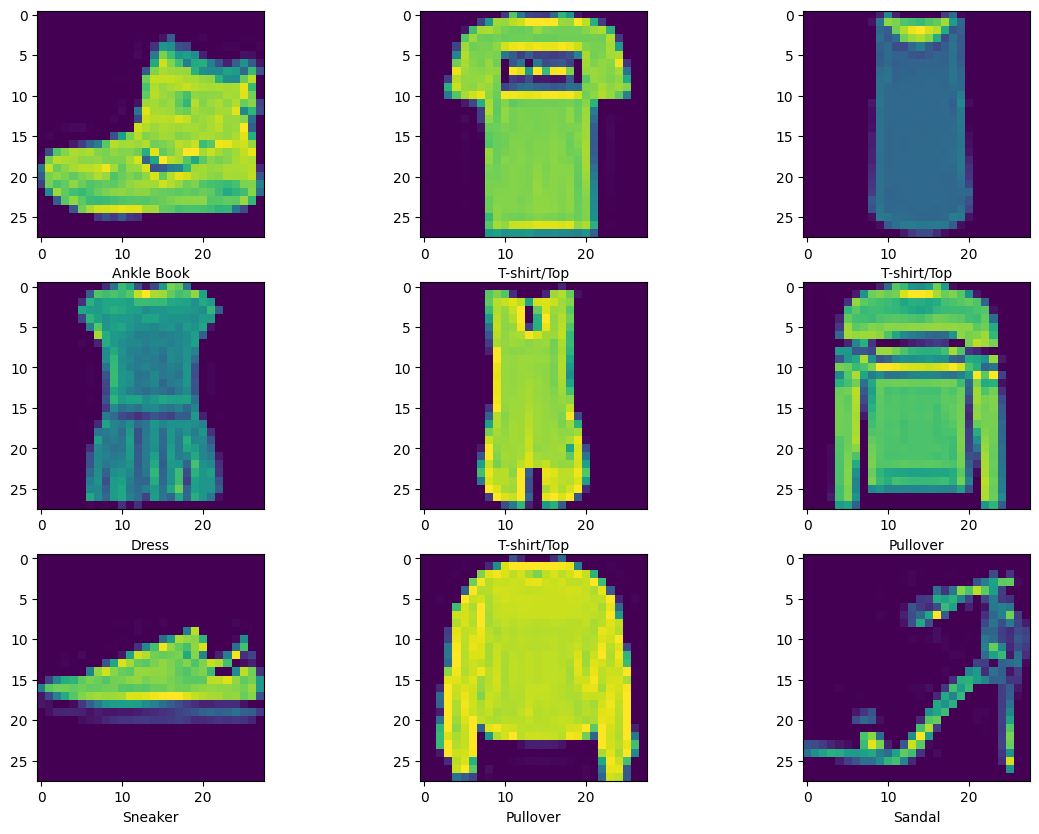

In [13]:
plt.figure(figsize=(14,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

In [14]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train[0]

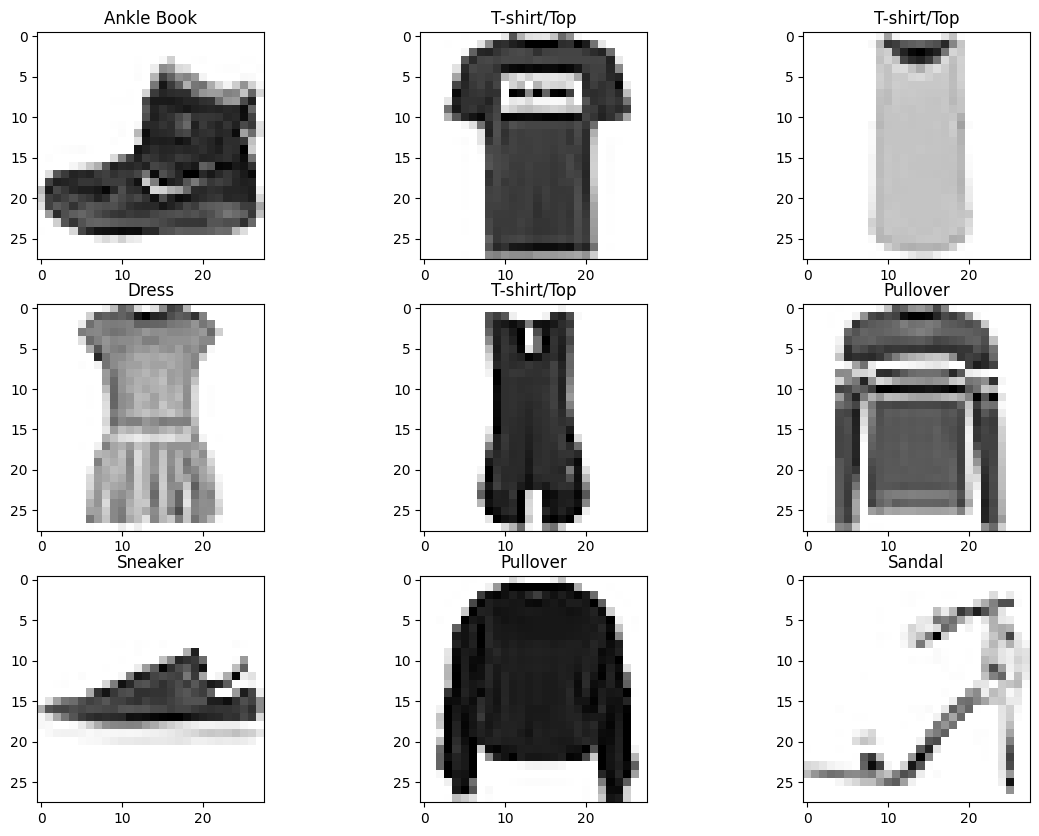

In [17]:
plt.figure(figsize=(14,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap="Greys")
    plt.title(class_names[y_train[i]])

In [18]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(64,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

In [19]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [20]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 6s 3ms/step - loss: 0.5203 - accuracy: 0.8167
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3947 - accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3596 - accuracy: 0.8694
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.8784
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3162 - accuracy: 0.8836
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3014 - accuracy: 0.8895
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2911 - accuracy: 0.8937
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2795 - accuracy: 0.8980
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2704 - accuracy: 0.9007
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2630 - accurac

In [21]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3599 - accuracy: 0.8703


[![cnn](https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

In [22]:
model = keras.models.Sequential([
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
keras.layers.Flatten(),
keras.layers.Dense(64,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [24]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [26]:
model.fit(x_train,y_train,epochs=1,callbacks=keras.callbacks.EarlyStopping(patience=2))

1875/1875 [==============================] - ETA: 0s - loss: 0.3507 - accuracy: 0.8729

1875/1875 [==============================] - 311s 166ms/step - loss: 0.3507 - accuracy: 0.8729


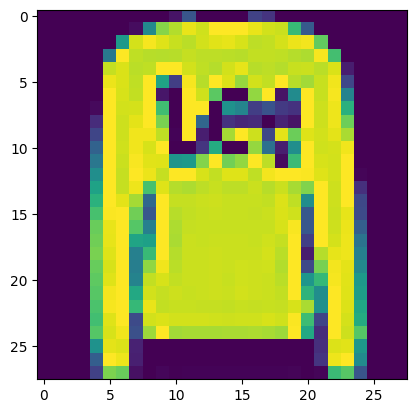

In [27]:
plt.imshow(x_test[1])

In [29]:
x_test[1].shape

(28, 28)

In [30]:
new_image = tf.expand_dims(x_test[1], axis=-1)

In [34]:
tf.expand_dims(new_image, axis=0).shape

TensorShape([1, 28, 28, 1])

In [35]:
pred = model.predict(tf.expand_dims(new_image, axis=0))

1/1 [==============================] - 0s 80ms/step


In [36]:
pred

array([[3.9956118e-05, 3.6613539e-08, 9.9910080e-01, 7.3431102e-06,
        2.7977000e-04, 1.0848977e-09, 5.7045004e-04, 1.1192507e-09,
        1.7123277e-06, 1.1217970e-11]], dtype=float32)

In [37]:
import numpy as np

In [38]:
result = np.argmax(pred)
print(result)
print(class_names[result])

2
Pullover
